In [87]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [88]:
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution

In [89]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, linespace)
network = ArtificialNetwork(200, "stochastic_block_model")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
insights = Insights(["diversity", "disagreement"])
simulation = Simulation(1000, insights)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

In [90]:
all_extreme_agents = [0, 5, 10, 20, 50]
div_nobias = []
dis_nobias = []
div_evbias = []
dis_evbias = []
div_assimbias = []
dis_assimbias = []
div_seekbias = []
dis_seekbias = []
div_evassim = []
dis_evassim = []
div_evseek = []
dis_evseek = []
div_all = []
dis_all = []
simulation = Simulation(10000, insights)
for extreme_agents in all_extreme_agents:
    agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)
    agent_network.set_extreme_agents(0.02, extreme_agents, extreme_agents)
    update_rule = UpdateRule(evaluation_bias=0, assimilation_bias=0, rewire_probability=0)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_nobias.append(simulation.insights.diversity_evolution)
    dis_nobias.append(simulation.insights.disagreement_evolution)

    update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0, rewire_probability=0)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_evbias.append(simulation.insights.diversity_evolution)
    dis_evbias.append(simulation.insights.disagreement_evolution)

    update_rule = UpdateRule(evaluation_bias=0, assimilation_bias=0.1, rewire_probability=0)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_assimbias.append(simulation.insights.diversity_evolution)
    dis_assimbias.append(simulation.insights.disagreement_evolution)

    update_rule = UpdateRule(evaluation_bias=0, assimilation_bias=0, rewire_probability=1)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_seekbias.append(simulation.insights.diversity_evolution)
    dis_seekbias.append(simulation.insights.disagreement_evolution)

    update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0.1, rewire_probability=0)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_evassim.append(simulation.insights.diversity_evolution)
    dis_evassim.append(simulation.insights.disagreement_evolution)

    update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0, rewire_probability=1)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_evseek.append(simulation.insights.diversity_evolution)
    dis_evseek.append(simulation.insights.disagreement_evolution)

    update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0.1, rewire_probability=1)
    interactions = Interactions(update_rule, interaction_rate=1, interacting_agents=True)
    simulation.run(interactions, agent_network)
    div_all.append(simulation.insights.diversity_evolution)
    dis_all.append(simulation.insights.disagreement_evolution)

Progress: 100%|██████████| 10000/10000 [01:10<00:00, 142.79it/s]


/var/folders/qj/5zmtfh2n12qb00h_8gwh8zhh0000gn/T/ipykernel_45173/2499022724.py:85: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


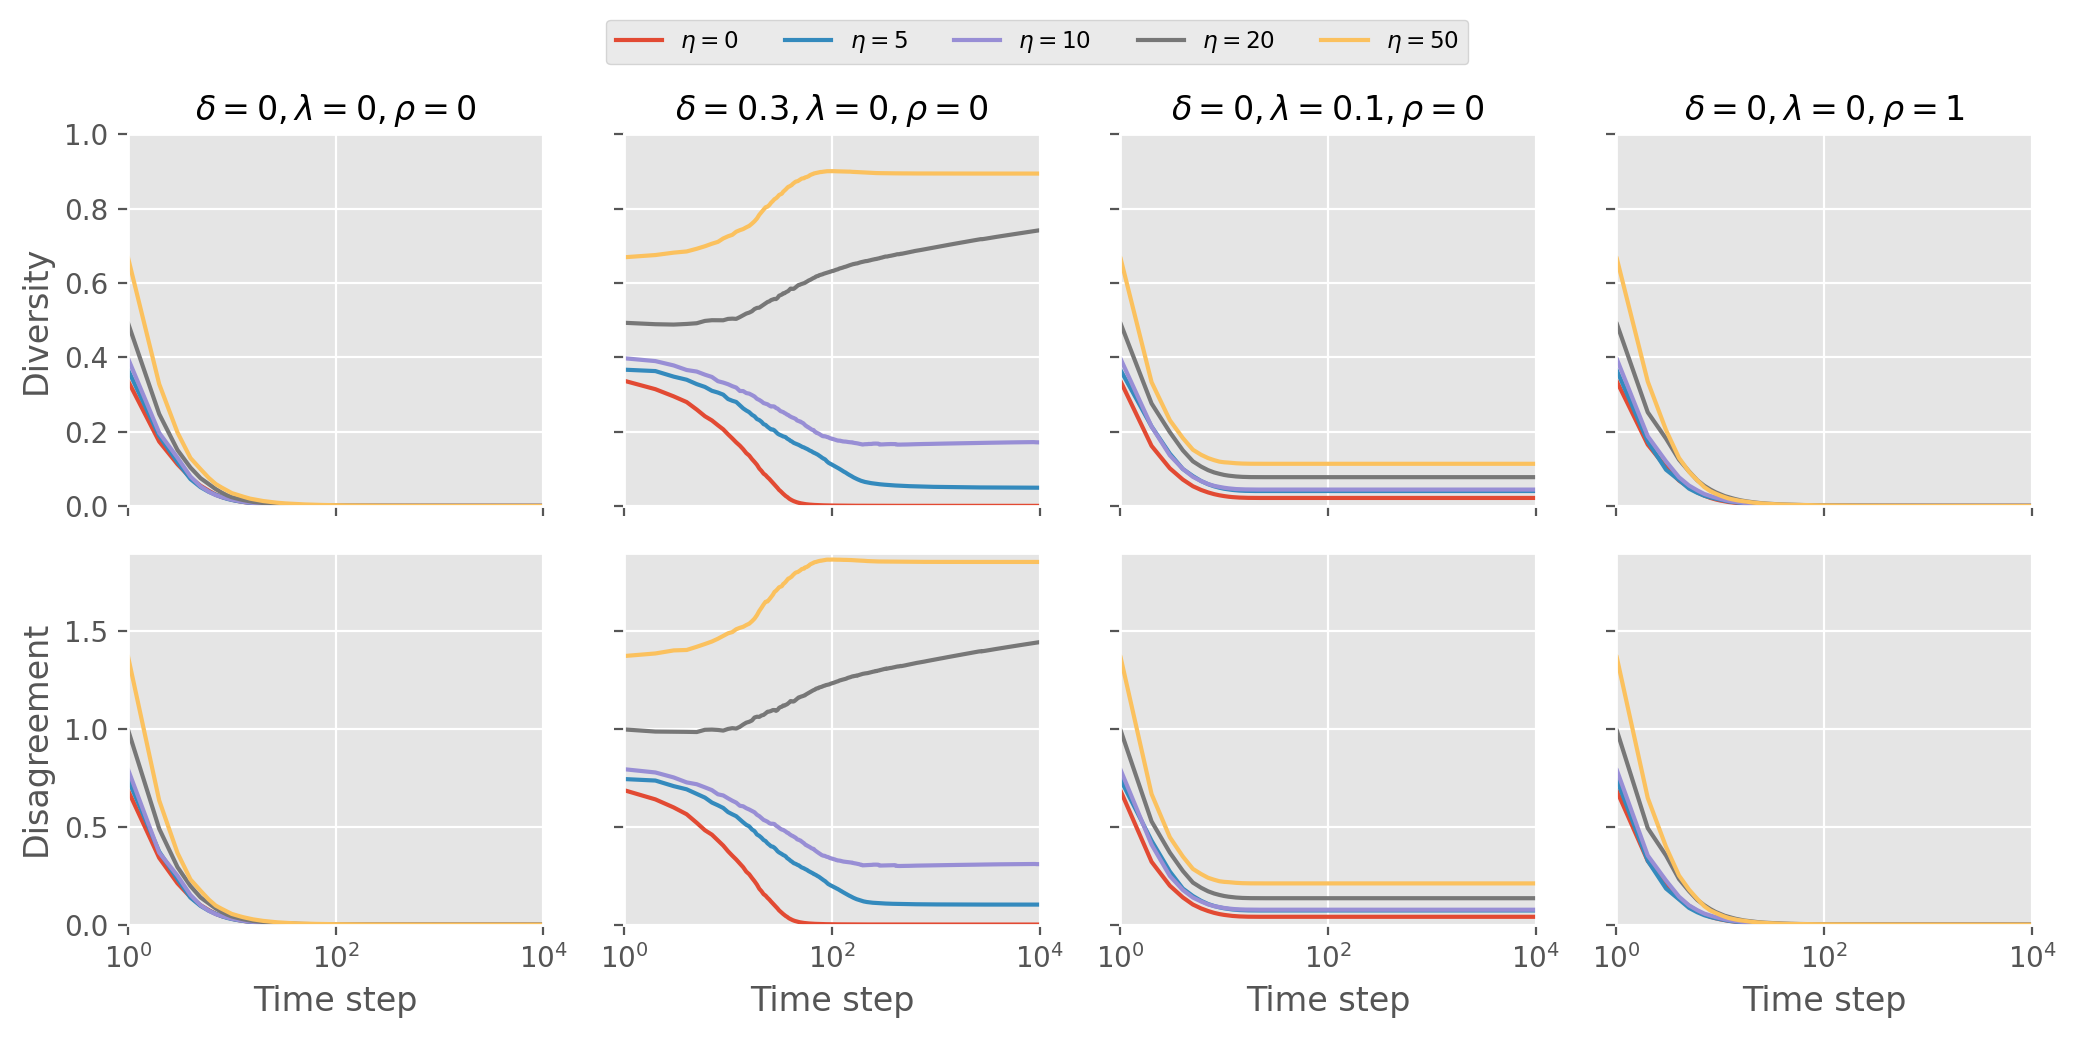

In [96]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=False, figsize=[10.5,5])
handles = []
labels = []

pad = 5 

for k in range(len(div_nobias)):
    axs[0,0].set_xscale('log')
    axs[0,0].plot(div_nobias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,0].set(xlabel='Time step', ylabel='Diversity')
axs[0,0].set_xlim(1, 10000)
axs[0,0].set_ylim(0, 1)

axs[0,0].annotate(r'$\delta = 0, \lambda = 0, \rho = 0$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(div_evbias)):
    axs[0,1].set_xscale('log')
    axs[0,1].plot(div_evbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,1].set(xlabel='Time step', ylabel='Diversity')
axs[0,1].set_xlim(1, 10000)
axs[0,1].set_ylim(0, 1)

axs[0,1].annotate(r'$\delta = 0.3, \lambda = 0, \rho = 0$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(div_assimbias)):
    axs[0,2].set_xscale('log')
    axs[0,2].plot(div_assimbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,2].set(xlabel='Time step', ylabel='Diversity')
axs[0,2].set_xlim(1, 10000)
axs[0,2].set_ylim(0, 1)

axs[0,2].annotate(r'$\delta = 0, \lambda = 0.1, \rho = 0$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(div_seekbias)):
    axs[0,3].set_xscale('log')
    axs[0,3].plot(div_seekbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,3].set(xlabel='Time step', ylabel='Diversity')
axs[0,3].set_xlim(1, 10000)
axs[0,3].set_ylim(0, 1)

axs[0,3].annotate(r'$\delta = 0, \lambda = 0, \rho = 1$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(dis_nobias)):
    axs[1,0].set_xscale('log')
    axs[1,0].plot(dis_nobias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,0].set(xlabel='Time step', ylabel='Disagreement')
axs[1,0].set_xlim(1, 10000)
axs[1,0].set_ylim(0, 1.9)

for k in range(len(dis_evbias)):
    axs[1,1].set_xscale('log')
    axs[1,1].plot(dis_evbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,1].set(xlabel='Time step', ylabel='Disagreement')
axs[1,1].set_xlim(1, 10000)
axs[1,1].set_ylim(0, 1.9)

for k in range(len(dis_assimbias)):
    axs[1,2].set_xscale('log')
    axs[1,2].plot(dis_assimbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,2].set(xlabel='Time step', ylabel='Disagreement')
axs[1,2].set_xlim(1, 10000)
axs[1,2].set_ylim(0, 1.9)

for k in range(len(dis_seekbias)):
    axs[1,3].set_xscale('log')
    axs[1,3].plot(dis_seekbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,3].set(xlabel='Time step', ylabel='Disagreement')
axs[1,3].set_xlim(1, 10000)
axs[1,3].set_ylim(0, 1.9)

legend_handles, legend_labels = axs[0, 0].get_legend_handles_labels()
lgd = fig.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(all_extreme_agents), fontsize='small')
        
for ax in axs.flat:
    ax.label_outer()

fig.show()
plt.tight_layout()
fig.savefig('../../../../../results/plots/Results/Polarisation/single_biases.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [93]:
with open('../../../../../results/data/polarising/varying_pol.npy', 'wb') as f:
    np.save(f, div_nobias)
    np.save(f, dis_nobias)
    np.save(f, div_evbias)
    np.save(f, dis_evbias)
    np.save(f, div_assimbias)
    np.save(f, dis_assimbias)
    np.save(f, div_seekbias)
    np.save(f, dis_seekbias)
    np.save(f, div_evassim)
    np.save(f, dis_evassim)
    np.save(f, div_evseek)
    np.save(f, dis_evseek)
    np.save(f, div_all)
    np.save(f, dis_all)

/var/folders/qj/5zmtfh2n12qb00h_8gwh8zhh0000gn/T/ipykernel_45173/2138759808.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


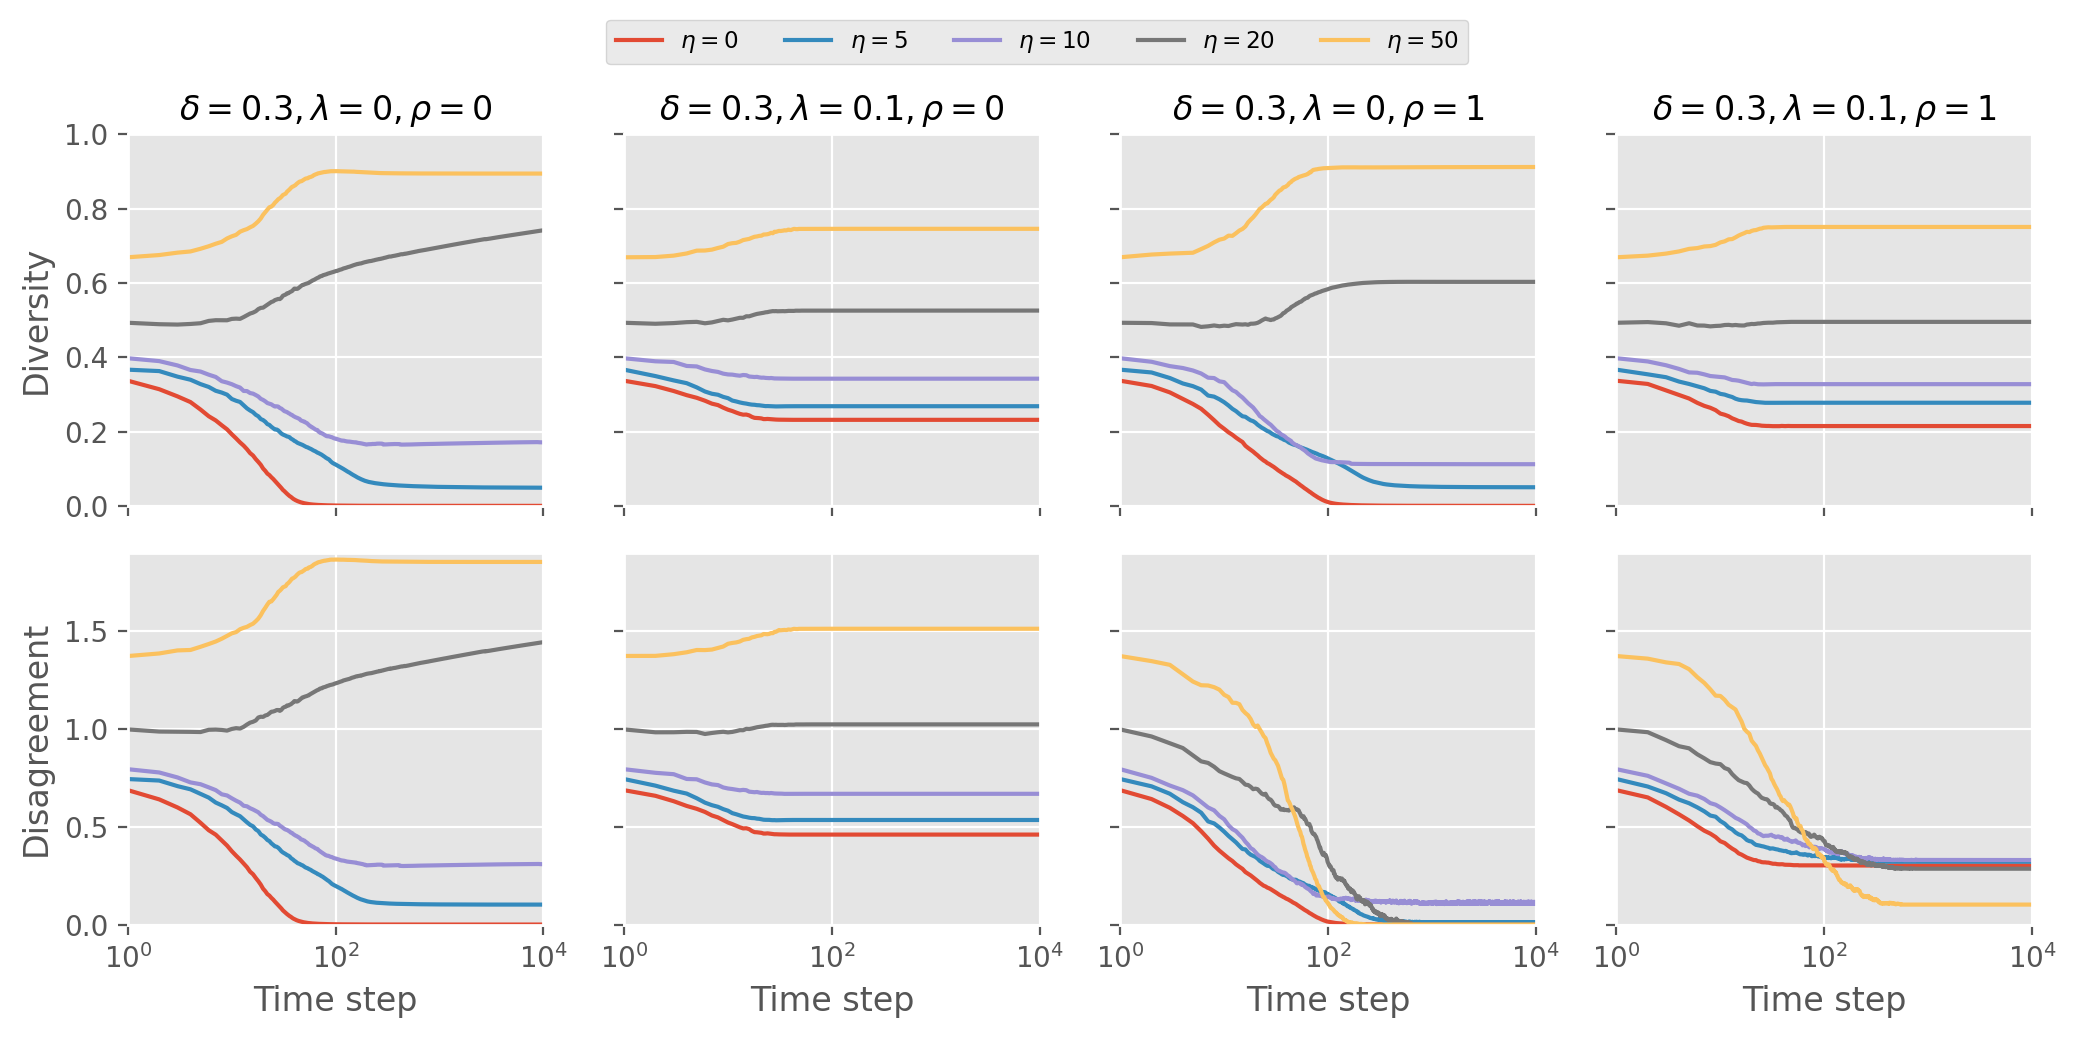

In [95]:
fig, axs = plt.subplots(2, 4, sharex=True, sharey=False, figsize=[10.5,5])
handles = []
labels = []

pad = 5 



for k in range(len(div_evbias)):
    axs[0,0].set_xscale('log')
    axs[0,0].plot(div_evbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,0].set(xlabel='Time step', ylabel='Diversity')
axs[0,0].set_xlim(1, 10000)
axs[0,0].set_ylim(0, 1)

axs[0,0].annotate(r'$\delta = 0.3, \lambda = 0, \rho = 0$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(div_evassim)):
    axs[0,1].set_xscale('log')
    axs[0,1].plot(div_evassim[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,1].set(xlabel='Time step', ylabel='Diversity')
axs[0,1].set_xlim(1, 10000)
axs[0,1].set_ylim(0, 1)

axs[0,1].annotate(r'$\delta = 0.3, \lambda = 0.1, \rho = 0$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(div_evseek)):
    axs[0,2].set_xscale('log')
    axs[0,2].plot(div_evseek[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,2].set(xlabel='Time step', ylabel='Diversity')
axs[0,2].set_xlim(1, 10000)
axs[0,2].set_ylim(0, 1)

axs[0,2].annotate(r'$\delta = 0.3, \lambda = 0, \rho = 1$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(div_all)):
    axs[0,3].set_xscale('log')
    axs[0,3].plot(div_all[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[0,3].set(xlabel='Time step', ylabel='Diversity')
axs[0,3].set_xlim(1, 10000)
axs[0,3].set_ylim(0, 1)

axs[0,3].annotate(r'$\delta = 0.3, \lambda = 0.1, \rho = 1$', xy=(0.5, 1), xytext=(0, pad),
            xycoords='axes fraction', textcoords='offset points',
            size='large', ha='center', va='baseline')

for k in range(len(dis_evbias)):
    axs[1,0].set_xscale('log')
    axs[1,0].plot(dis_evbias[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,0].set(xlabel='Time step', ylabel='Disagreement')
axs[1,0].set_xlim(1, 10000)
axs[1,0].set_ylim(0, 1.9)

for k in range(len(dis_evassim)):
    axs[1,1].set_xscale('log')
    axs[1,1].plot(dis_evassim[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,1].set(xlabel='Time step', ylabel='Disagreement')
axs[1,1].set_xlim(1, 10000)
axs[1,1].set_ylim(0, 1.9)

for k in range(len(dis_evseek)):
    axs[1,2].set_xscale('log')
    axs[1,2].plot(dis_evseek[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,2].set(xlabel='Time step', ylabel='Disagreement')
axs[1,2].set_xlim(1, 10000)
axs[1,2].set_ylim(0, 1.9)

for k in range(len(dis_all)):
    axs[1,3].set_xscale('log')
    axs[1,3].plot(dis_all[k], label=r'$\eta = {}$'.format(all_extreme_agents[k]))
    axs[1,3].set(xlabel='Time step', ylabel='Disagreement')
axs[1,3].set_xlim(1, 10000)
axs[1,3].set_ylim(0, 1.9)

legend_handles, legend_labels = axs[0, 0].get_legend_handles_labels()
lgd = fig.legend(legend_handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(all_extreme_agents), fontsize='small')
        
for ax in axs.flat:
    ax.label_outer()

fig.show()
plt.tight_layout()
fig.savefig('../../../../../results/plots/Results/Polarisation/ev_and_other.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')